### Matplotlib plots for LHCP poster

This code generates the background composition diagrams I put on my LHCP poster about the monoZ' search in 2018.

In [44]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [45]:
# Data
r = [0,1,2]
raw_data = {
    'wjets': [
        68300, 4270, 115
    ],
    'zjets': [
        72200, 7230, 1160
    ],
    'ttbar': [
        3900, 10320, 4920
    ],
    'stop': [
        752, 1530, 466
    ], 
    'diboson': [
        2000, 282, 14.6
    ], 
    'multijet': [
        17100, 7870, 880
    ]}
df = pd.DataFrame(raw_data)

In [38]:
# From raw value to percentage
totals = [i+j+k+l+m+n for i,j,k,l,m,n in zip(df['wjets'], df['zjets'], df['ttbar'], df['stop'], df['diboson'], df['multijet'])]
wjets = [i / j * 100 for i,j in zip(df['wjets'], totals)]
zjets = [i / j * 100 for i,j in zip(df['zjets'], totals)]
ttbar = [i / j * 100 for i,j in zip(df['ttbar'], totals)]
stop = [i / j * 100 for i,j in zip(df['stop'], totals)]
diboson = [i / j * 100 for i,j in zip(df['diboson'], totals)]
multijet = [i / j * 100 for i,j in zip(df['multijet'], totals)]

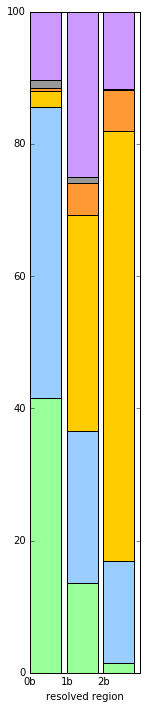

In [51]:
# plot
fig = plt.figure(figsize=cm2inch(5,30.1))

barWidth = 0.85
names = ('0b','1b','2b')
# Create green Bars
plt.bar(r, wjets, color='#99ff99', width=barWidth, label="$W$ + jets")
# Create orange Bars
plt.bar(r, zjets, bottom=wjets, color='#99ccff', width=barWidth, label="$Z$ + jets")
# Create blue Bars
plt.bar(r, ttbar, bottom=[i+j for i,j in zip(wjets, zjets)], color='#ffcc00', width=barWidth, label="$t\overline{t}$")
# Create single top
plt.bar(r, stop, bottom=[i+j+k for i,j,k in zip(wjets, zjets, ttbar)], color='#ff9933', width=barWidth, label="Single-top quark")
# Create diboson
plt.bar(r, diboson, bottom=[i+j+k+l for i,j,k,l in zip(wjets, zjets, ttbar, stop)], color='#999999', width=barWidth, label="Diboson")
# Create multijet
plt.bar(r, multijet, bottom=[i+j+k+l+m for i,j,k,l,m in zip(wjets, zjets, ttbar, stop, diboson)], color='#cc99ff', width=barWidth, label="Multijet")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("resolved region")
 
# Add a legend
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# plt.tight_layout()
    
# Show graphic
plt.show()